# Telecom Churn Case Study

### Business Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
**For many incumbent operators, retaining high profitable customers is the number one business goal.**

**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**

### Objective

In this project, we will 
* analyze customer-level data of a leading telecom firm, 
* build predictive models to identify customers at high risk of churn and 
* identify the main indicators of churn.

#### Churn Definition

This project is based on Indian and Southeast Asian market and fillowing **Usage-based Churn definition** will be used:

*Usage-based churn:Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.*

#### High Value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

#### Data and Business Objective

**dataset**: The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**business objective**: is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

####  Understanding Customer Behaviour during Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The **‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.

2. The **‘action’ phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The **‘churn’ phase**: In this phase, the customer is said to have churned. We define churn based on this phase.

In this project, since we are working over a four-month window:
* the first two months (6th and 7th month data) are the ‘good’ phase, 
* the third month (8th month) is the ‘action’ phase, 
* while the fourth month (9th month) is the ‘churn’ phase.

###  Step 1- Load Data and Data Cleaning

In [218]:
# import numpy and pandas
import pandas as pd
import numpy as np

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# do an inline so that plt.show() is not required everytime
%matplotlib inline

# import for pre-processing
# scale (this is same as standard scalar)
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# label encoding
from sklearn.preprocessing import LabelEncoder

# import for model selection:
# splitting data into training and test data (validation set)
from sklearn.model_selection import train_test_split
# import for creating K-folds
from sklearn.model_selection import KFold
# import for CV using folds created
from sklearn.model_selection import cross_val_score
# import for grid search cv for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score,accuracy_score, classification_report
# for deleting unused variables
import gc

# Models
from sklearn.ensemble import RandomForestClassifier

# filter warnings
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
# load the telecom churn data
telecom = pd.read_csv('./telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Inspect Data
print(telecom.info())
print(telecom.shape)
print(telecom.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None
(99999, 226)
       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0 

Let's start analysis with recharge related variables as this will help us determine the **high value customers**

#### 1. Analysis on recharge amount data

In [6]:
# let us first extract list of columns containing recharge amount
recharge_amnt_columns =  telecom.columns[telecom.columns.str.contains('rech_amt|rech_data')]

print(recharge_amnt_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


we observe from above that there are 5 set of values for
* total recharge amount,
* maximum recharge amount and 
* average recharge amount for data.
* total recharge for data
* maximum recharge for data

In [7]:
# let us check if there are any missing values for recharge amount
100*telecom.loc[:,recharge_amnt_columns].isnull().sum()/len(telecom)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

we observe that approx 74-75% values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.

In [8]:
recharge_amnt_columns_6 = telecom.columns[telecom.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

telecom.loc[:,recharge_amnt_columns_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


We can see that total_rech_data has discrete values and the non NA values for total_rech_data and av_rech_amt_data is the same, thus we can find out the total recharge amount for data from the two.

In [9]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = telecom['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = telecom['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = telecom['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(telecom.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(telecom.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(telecom.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = telecom['total_rech_data_6'] == np.nan 
is_invalid_data_7 = telecom['total_rech_data_7'] == np.nan 
is_invalid_data_8 = telecom['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(telecom.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(telecom.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(telecom.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


**We see from above the values are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0,
meaning that there was no recharge done by the customer.**

In [10]:
telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [11]:
telecom.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
telecom.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [12]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [13]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6*telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7*telecom.total_rech_data_7
telecom['total_rech_amt_data_8'] = telecom.av_rech_amt_data_8*telecom.total_rech_data_8

**We will define total average recharge amount for good phase as the average of total recharge amount and total recharge amount for data for months 6 and 7 (good phase months).**

In [14]:
telecom['total_avg_rech_amnt_good_ph'] = (telecom.total_rech_amt_6 +telecom.total_rech_amt_data_6 \
                                               + telecom.total_rech_amt_7+telecom.total_rech_amt_data_7)/2

**We define High Value Customer as those who have total average recharge amount for good phase greater than the 70th percentile value.**

In [15]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom.total_avg_rech_amnt_good_ph >= telecom.total_avg_rech_amnt_good_ph.quantile(0.7)

In [16]:
# let us subset out the High Value customers
telecom = telecom.loc[high_value_filter,:]

In [17]:
# let us check how many records remain
len(telecom.loc[high_value_filter,:])

30001

#### Tagging of the customers as churn and not churn

In [18]:
# Now let us label the churned customers
# define a new column in data frame as 'churn' with value as 1 if customer has churned and 0 if customer has not churned
# Initially set all the values as 0
telecom['churn']= 0

In [19]:
# the following columns will be used to find the churned customers in the 9th month 
# total_ic_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9
# let's check if any NA/Null values are present
ls_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*telecom.loc[:,ls_9].isnull().sum()/len(telecom)

total_ic_mou_9    0.0
total_ic_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [20]:
# define is_churned boolean flag for customers where above values are zero
is_churned = (telecom.total_ic_mou_9 == 0) & (telecom.total_ic_mou_9 == 0) & (telecom.vol_2g_mb_9 ==0)& \
(telecom.vol_3g_mb_9 ==0)

In [21]:
# set all such rows fulfilling is_churned condition as 1
telecom.loc[is_churned,'churn']=1

In [22]:
# let us check what's the % of churned customers
100*telecom.churn.sum()/len(is_churned)

8.406386453784874

**We see that approx. 8.4% of high value customers have churned.**

In [23]:
# let's extract all list of 9th Month (churned month) Columns
month_9_columns =  telecom.columns[telecom.columns.str.contains('_9')]

In [24]:
# drop all columns corresponding to the attributes of churn phase
telecom.drop(month_9_columns,axis=1,inplace=True)

In [25]:
# let's check how many columns remain
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 177 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(9)
memory usage: 40.7+ MB


In [26]:
100*telecom.isnull().sum()/len(telecom.index)

mobile_number                   0.000000
circle_id                       0.000000
loc_og_t2o_mou                  0.746642
std_og_t2o_mou                  0.746642
loc_ic_t2o_mou                  0.746642
last_date_of_month_6            0.000000
last_date_of_month_7            0.089997
last_date_of_month_8            0.549982
arpu_6                          0.000000
arpu_7                          0.000000
arpu_8                          0.000000
onnet_mou_6                     1.816606
onnet_mou_7                     1.789940
onnet_mou_8                     3.913203
offnet_mou_6                    1.816606
offnet_mou_7                    1.789940
offnet_mou_8                    3.913203
roam_ic_mou_6                   1.816606
roam_ic_mou_7                   1.789940
roam_ic_mou_8                   3.913203
roam_og_mou_6                   1.816606
roam_og_mou_7                   1.789940
roam_og_mou_8                   3.913203
loc_og_t2t_mou_6                1.816606
loc_og_t2t_mou_7

Let's create a function to **analyze_feature** across months 6,7 (good phase) and 8.This function will do the following:
* create box plots to compare variable distribution across months 6,7 and 8 for churn and non-churn customers.
* create summary of the mean and standard deviation of variable distribution across months 6,7 and 8 for churn and non-churn customers.

In [27]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": telecom[telecom["churn"] == churn][cols[6]].mean(),
        "mean_7": telecom[telecom["churn"] == churn][cols[7]].mean(),
        "mean_8": telecom[telecom["churn"] == churn][cols[8]].mean(),
        "std_6": telecom[telecom["churn"] == churn][cols[6]].std(),
        "std_7": telecom[telecom["churn"] == churn][cols[7]].std(),
        "std_8": telecom[telecom["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=telecom, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=telecom, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=telecom, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Churned","Non Churned"}).round(2)

In [28]:
#let's again extract the recharge amount related columns
recharge_amnt_columns =  telecom.columns[telecom.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.56,663.82,614.54,548.02,574.33,615.19
Churned,782.50,624.30,255.57,675.28,663.40,450.55


<Figure size 1224x504 with 0 Axes>

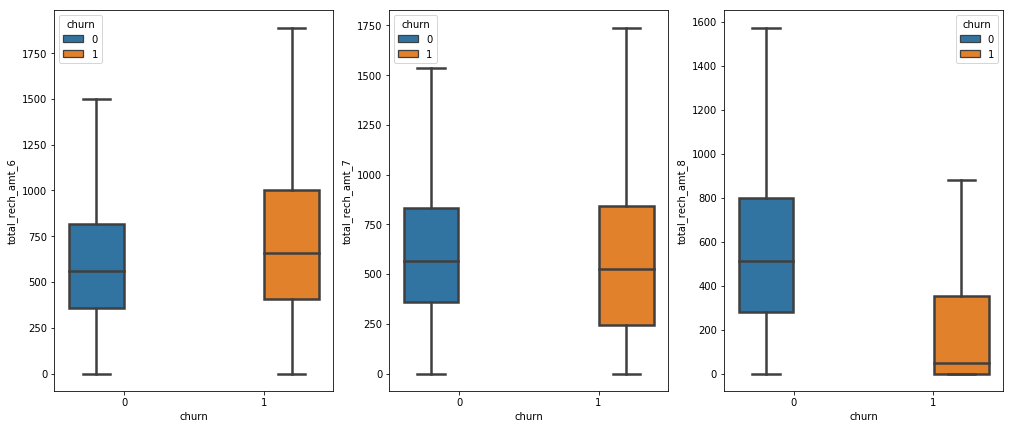

In [29]:
# let's analyze total recharge amount:
analyze_feature('total_rech_amt')

**We do see a drop in the total recharge amount for churned customers.**

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7', 8: 'total_rech_amt_data_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,460.70,545.73,498.19,1447.90,1500.10,1685.29
Churned,402.12,337.63,82.54,1047.33,1165.83,470.96


<Figure size 1224x504 with 0 Axes>

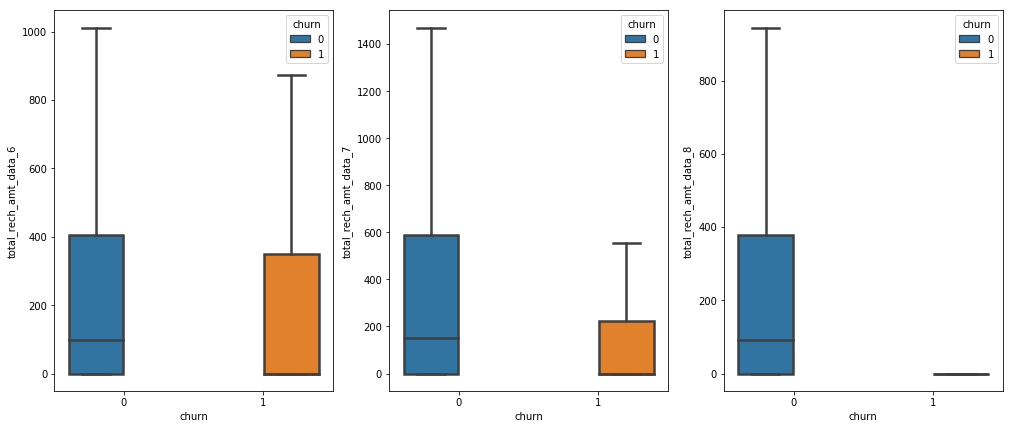

In [30]:
# let's analyze total recharge amount for data:
analyze_feature('total_rech_amt_data')

**We see that there is a significant drop in total recharge amount for data in 8th month (action phase) for churned customers.**

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,168.85,173.23,166.78,171.50,176.37,170.97
Churned,173.98,161.00,87.89,212.49,228.85,180.84


<Figure size 1224x504 with 0 Axes>

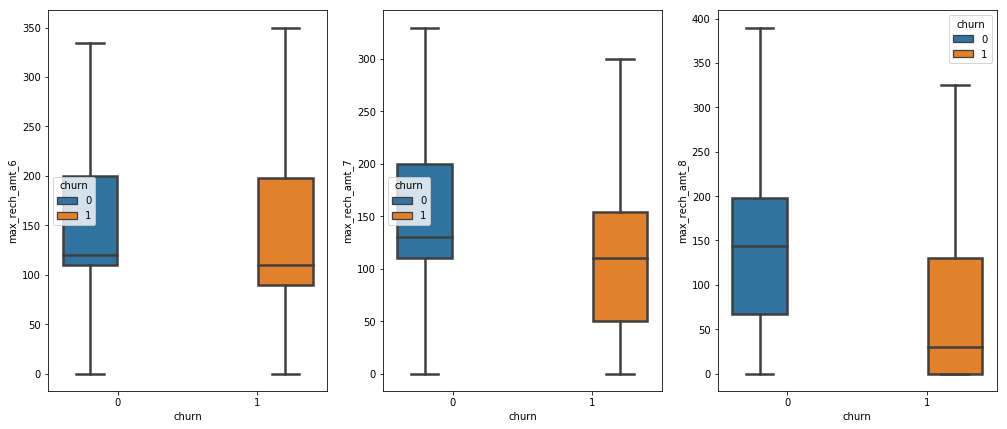

In [31]:
# let's analyze maximum recharge amount for data:
analyze_feature('max_rech_amt')

**We observe drop in maximum recharge amount as well.**

As we have already derived total recharge amount for data using average recharge amount for data and total recharge for data let's drop these columns.

In [32]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
telecom.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [33]:
# Let us define 3 new derived columns
# total recharge amount for good phase: total_rech_amt_good_ph
# total recharge amount data for good phase: total_rech_amt_data_good_ph
# max recharge amount for good phase: max_rech_amt_good_ph

telecom['total_rech_amt_good_ph'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7)/2
telecom['total_rech_amt_data_good_ph'] = (telecom.total_rech_amt_data_6 + telecom.total_rech_amt_data_7)/2
telecom['max_rech_amt_good_ph'] = (telecom.max_rech_amt_6 + telecom.max_rech_amt_7)/2

# drop the original columns as these are not longer required
telecom.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
telecom.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

#### 2. Last day recharge amount

In [34]:
#let's extract the last day recharge amount columns
last_day_rech_amt = telecom.columns[telecom.columns.str.contains('day')]

Churn Stats (mean and standard deviation):
{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,100.36,102.08,97.35,140.19,138.95,145.09
Churned,106.67,81.52,38.43,177.76,159.67,134.92


<Figure size 1224x504 with 0 Axes>

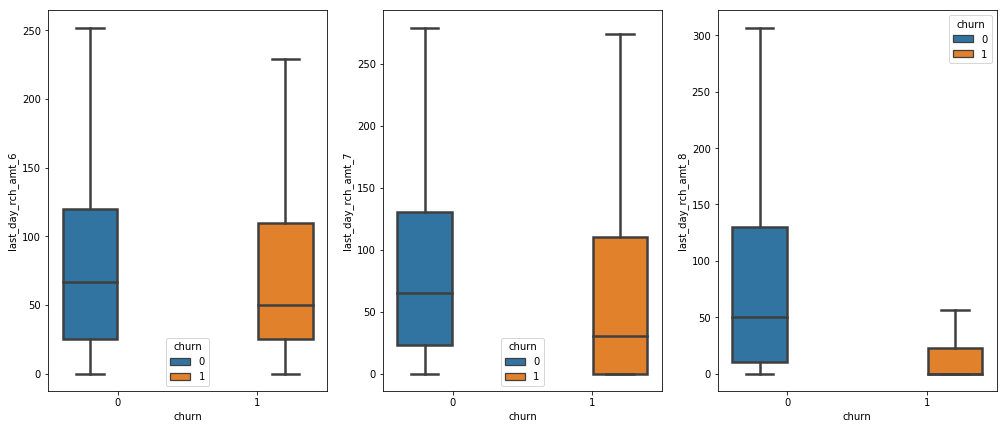

In [35]:
# let's check the mean variation in last day recharge for churned and non churned customers
analyze_feature('last_day_rch_amt')

**We can see that there is a significant drop in last month recharge amount for churned customers.**

In [36]:
# Let us define new derived column
# last day recharge amount for good phase: last_day_rch_amt_good_ph
telecom['last_day_rch_amt_good_ph'] = (telecom.last_day_rch_amt_6 + telecom.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
telecom.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

**Other recharge related variables**

In [37]:
# Let's check other recharge related variables:
ls_recharge = telecom.columns[telecom.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [38]:
# lets check the % of NA values for recharge related variables
100*telecom.loc[:,ls_recharge].isnull().sum()/len(telecom)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.148528
max_rech_data_7     43.145228
max_rech_data_8     46.825106
dtype: float64

In [39]:
# let's check the distribution for max_rech_data
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


**We see that the minimum value is 1 while the max is 1555 across months, which implies the missing values are cases where there was no recharge for data, let's impute the missing values by 0 indicating no recharge.**

In [40]:
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [41]:
# Let us define new derived column
# maximum recharge for data for good phase: max_rech_data_good_ph
telecom['max_rech_data_good_ph'] = (telecom.max_rech_data_6 + telecom.max_rech_data_7)/2

# drop the original columns as these are no longer required
telecom.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [42]:
# let's check total recharge number
ls_tot_recharge_num = telecom.columns[telecom.columns.str.contains('total_rech_num')]

# check the summary stats:
print(telecom.loc[:,ls_tot_recharge_num].describe())

# let's check the median variation in total recharge numbers for churned and non churned customers
pd.DataFrame([telecom.loc[telecom.churn==0,ls_tot_recharge_num].median()
              ,telecom.loc[telecom.churn==1,ls_tot_recharge_num].median()],index={'Non Churned','Churned'})

       total_rech_num_6  total_rech_num_7  total_rech_num_8
count      30001.000000      30001.000000      30001.000000
mean          11.851005         11.718843          9.972868
std            9.429132          9.432418          9.274370
min            0.000000          0.000000          0.000000
25%            6.000000          6.000000          4.000000
50%            9.000000          9.000000          8.000000
75%           15.000000         15.000000         13.000000
max          307.000000        138.000000        196.000000


,total_rech_num_6,total_rech_num_7,total_rech_num_8
Non Churned,9.0,9.0,8.0
Churned,11.0,9.0,3.0


**While there are some outliers in 6th month overall distribution is similar for 6,7 and 8th month, we do see a drop in median recharge numbers.**

In [43]:
# Let us define new derived column
# total recharge number for good phase: total_rech_num_good_ph
telecom['total_rech_num_good_ph'] = (telecom.total_rech_num_6 + telecom.total_rech_num_7)/2

# drop the original columns as these are not longer required
telecom.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

#### 3.  2G and 3G usage related variables

In [44]:
#let's extract the 2G and 3G usage related columns
typ_2g_or_3g = telecom.columns[telecom.columns.str.contains('2g|3g',regex=True)]

In [45]:
#let us check the % of NA values present
telecom.loc[:,typ_2g_or_3g].isnull().sum()/len(telecom.loc[:,typ_2g_or_3g])

count_rech_2g_6    0.441485
count_rech_2g_7    0.431452
count_rech_2g_8    0.468251
count_rech_3g_6    0.441485
count_rech_3g_7    0.431452
count_rech_3g_8    0.468251
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.441485
arpu_3g_7          0.431452
arpu_3g_8          0.468251
arpu_2g_6          0.441485
arpu_2g_7          0.431452
arpu_2g_8          0.468251
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

**We see from above that about 60% values are not available for count of recharge and average revenue for 2G/3G per user. As we aleady have 2G/3G volume usage based data available, let's drop these columns.**

In [46]:
telecom.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [47]:
# let's extract volume of 2G and 3G usage columns
volume_of_usage_3g_and_2g = telecom.columns[telecom.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
print(telecom.loc[:,volume_of_usage_3g_and_2g].describe())

        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     126.522185    125.097326    105.913072    344.258568    370.196701   
std      330.530793    331.548010    313.384838    913.747778    915.525911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.050000      0.000000      0.000000      0.000000   
75%       83.450000     77.770000     51.650000    358.740000    410.700000   
max    10285.900000   7873.550000  11117.610000  45735.400000  28144.120000   

        vol_3g_mb_8  
count  30001.000000  
mean     351.493998  
std      919.021056  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      356.190000  
max    30036.060000  


In [48]:
# let's check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom.loc[telecom.churn==0,volume_of_usage_3g_and_2g].mean()
              ,telecom.loc[telecom.churn==1,volume_of_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churned,128.074912,128.464723,113.562745,350.312362,384.200039,375.776694
Churned,109.604104,88.407121,22.564389,278.298136,217.620278,86.916594


We have two observations from above:
* the 2G and 3G usage for churned customers drops in 8th month 
* we also see that average 3G usage is higher for non-churned customers indicating that churned customers might be from areas where 3G service is not properly available.

In [49]:
# Let us define two new derived columns
# 2G volume usage for good phase: vol_2g_mb_good_ph
# 3G volume usage for good phase: vol_3g_mb_good_ph
telecom['vol_2g_mb_good_ph'] = (telecom.vol_2g_mb_6 + telecom.vol_2g_mb_7)/2
telecom['vol_3g_mb_good_ph'] = (telecom.vol_3g_mb_6 + telecom.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
telecom.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [50]:
# let's check monthly 2G/3G service schemes
monthly_2g_3g = telecom.columns[telecom.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

# let's check the summary stats:
print(telecom.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.174494      0.183261      0.153628      0.217759      0.229026   
std        0.434953      0.450423      0.406486      0.613199      0.659125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000     14.000000     16.000000   

       monthly_3g_8  
count  30001.000000  
mean       0.211026  
std        0.617549  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  


In [51]:
# let's check the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom.loc[telecom.churn==0,monthly_2g_3g].mean()
              ,telecom.loc[telecom.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churned,0.182030,0.193675,0.165581,0.219950,0.237017,0.225227
Churned,0.092387,0.069786,0.023394,0.193894,0.141951,0.056305


Again we see a drop in monthly subscription for churned customers in action month (8th month) as compared ot non churned customers.

In [52]:
# Let us define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
telecom['monthly_2g_good_ph'] = (telecom.monthly_2g_6 + telecom.monthly_2g_7)/2
telecom['monthly_3g_good_ph'] = (telecom.monthly_3g_6 + telecom.monthly_3g_7)/2

# drop the original columns as these are not longer required
telecom.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

#### 4. Volume based cost

In [53]:
# let us rename month named vbc columns to 6,7,8,9 format
telecom.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom.drop('vbc_3g_9',axis=1,inplace=True)

Churn Stats (mean and standard deviation):
{6: 'vbc_3g_6', 7: 'vbc_3g_7', 8: 'vbc_3g_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,162.62,186.49,180.93,421.60,452.97,433.33
Churned,113.95,95.86,40.64,356.49,311.75,210.34


<Figure size 1224x504 with 0 Axes>

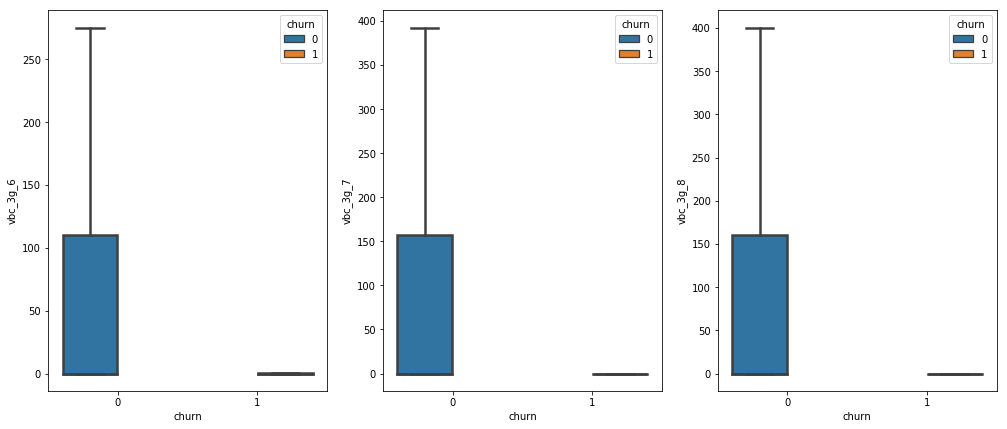

In [54]:
# let's check the volumne based cost for 3G
volumn_based_cost_3g = telecom.columns[telecom.columns.str.contains('vbc_3g')]

# analyze volume based cost
analyze_feature('vbc_3g')

**We can clearly see that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month.**

In [55]:
# Let us define new derived columns
# 3g volume based cost for good phase: vbc_3g_good_ph
telecom['vbc_3g_good_ph'] = (telecom['vbc_3g_6'] + telecom['vbc_3g_7'])/2

# drop the original columns as these are not longer required
telecom.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

#### 5. Sachet subscription

In [56]:
# let's check sachet subscription for 2G/3G
sachet_2g_or_3g = telecom.columns[telecom.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(telecom.loc[:,sachet_2g_or_3g].describe())

pd.DataFrame([telecom.loc[telecom.churn==0,sachet_2g_or_3g].mean()
              ,telecom.loc[telecom.churn==1,sachet_2g_or_3g].mean()],index={'Non Churned','Churned'})

        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_3g_6   sachet_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.066064      1.214026      1.054865      0.209393      0.227492   
std        2.507197      2.736158      2.535940      0.985674      1.089929   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       42.000000     48.000000     44.000000     29.000000     35.000000   

        sachet_3g_8  
count  30001.000000  
mean       0.202393  
std        1.100107  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       41.000000  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churned,1.069289,1.244368,1.127042,0.206703,0.228247,0.215110
Churned,1.030928,0.883426,0.268438,0.238699,0.219270,0.063838


There is a steep drop in sachet services in 8th month for churned cutsomers as compared to non churned customers

In [57]:
# Let us define two new derived columns
# 2G sachet for good phase: sachet_2g_good_ph
# 3G sachet for good phase: sachet_3g_good_ph
telecom['sachet_2g_good_ph'] = (telecom.sachet_2g_6 + telecom.sachet_2g_7)/2
telecom['sachet_3g_good_ph'] = (telecom.sachet_3g_6 + telecom.sachet_3g_7)/2

# drop the original columns as these are not longer required
telecom.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

#### 6. Age on network

In [58]:
# let's check the age on n/w for churned and non churned customers
print(telecom.loc[telecom.churn==1,'aon'].mean())
print(telecom.loc[telecom.churn==0,'aon'].mean())

859.3049167327517
1241.4973252301759


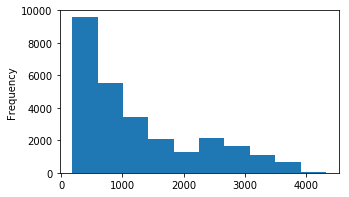

In [59]:
# let's check the age distribution for non churned customers
plt.figure(figsize=(5,3))
telecom.loc[telecom.churn==0,'aon'].plot.hist()

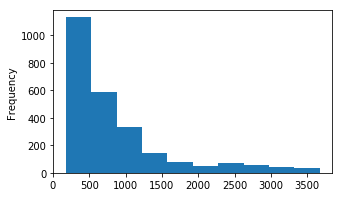

In [60]:
# let's check the age distribution for churned customers
plt.figure(figsize=(5,3))
telecom.loc[telecom.churn==1,'aon'].plot.hist()

**We see from above that most of the churn cases are happening before age 1500 days.**

In [61]:
# let's check the circle id values
telecom.circle_id.unique()

# let's drop this column as there is only one circle id
telecom.drop('circle_id',inplace=True,axis=1)

#### 7. Date related variables

In [62]:
# extract the date columns
date_columns = telecom.columns[telecom.columns.str.contains('date')]

# convert to datetime
for date_col in list(date_columns):
    telecom[date_col]= pd.to_datetime(telecom[date_col])

In [63]:
print(telecom.last_date_of_month_6.dt.day.unique(),telecom.last_date_of_month_7.dt.day.unique()
      ,telecom.last_date_of_month_8.dt.day.unique())

# as only 1 unique value last day of month is present these columns are not adding much information
# let us drop the columns
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

[30] [31. nan] [31. nan]


In [64]:
# let's extract the day of last recharge
telecom['day_of_last_rech_6'] =  telecom.date_of_last_rech_6.dt.day
telecom['day_of_last_rech_7'] =  telecom.date_of_last_rech_7.dt.day
telecom['day_of_last_rech_8'] =  telecom.date_of_last_rech_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([telecom.loc[telecom.churn==0,dt_of_last_rech_cols].median()
              ,telecom.loc[telecom.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Non Churned,28.0,29.0,29.0
Churned,28.0,27.0,26.0


**We can see that the median value for last recharge is bit lower for churned customers.**

In [65]:
# let's define a new derived column indicating the shift in day of last recharge

telecom['day_of_last_rech_shift'] = telecom.day_of_last_rech_8 -(telecom.day_of_last_rech_6+telecom.day_of_last_rech_7)/2

In [66]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([telecom.loc[telecom.churn==0,['day_of_last_rech_shift']].median()
              ,telecom.loc[telecom.churn==1,['day_of_last_rech_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_shift
Non Churned,0.5
Churned,-2.0


**We can clearly see that a large negative shift is highly indicative of churn**

In [67]:
# let's delete the other colummns derived as are no longer required
telecom.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

In [68]:
# let's extract the day of last recharge for data
telecom['day_of_last_rech_data_6'] =  telecom.date_of_last_rech_data_6.dt.day
telecom['day_of_last_rech_data_7'] =  telecom.date_of_last_rech_data_7.dt.day
telecom['day_of_last_rech_data_8'] =  telecom.date_of_last_rech_data_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([telecom.loc[telecom.churn==0,dt_of_last_rech_cols].median()
              ,telecom.loc[telecom.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Non Churned,22.0,24.0,23.0
Churned,23.0,20.0,15.0


In [69]:
# let's define a new derived column indicating the shift in day of last data recharge

telecom['day_of_last_rech_data_shift'] = telecom.day_of_last_rech_data_8 -(telecom.day_of_last_rech_data_6+telecom.day_of_last_rech_data_7)/2

In [70]:
# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([telecom.loc[telecom.churn==0,['day_of_last_rech_data_shift']].median()
              ,telecom.loc[telecom.churn==1,['day_of_last_rech_data_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_shift
Non Churned,-0.5
Churned,-6.0


In [71]:
# let's delete the other colummns derived as are no longer required
telecom.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

In [72]:
# let us drop the date columns as we have derived day of month variables from them
telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
telecom.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

#### 8. Average revenue per user

Churn Stats (mean and standard deviation):
{6: 'arpu_6', 7: 'arpu_7', 8: 'arpu_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,549.23,562.86,533.26,447.05,474.10,504.14
Churned,659.36,538.11,239.87,579.28,537.32,386.45


<Figure size 1224x504 with 0 Axes>

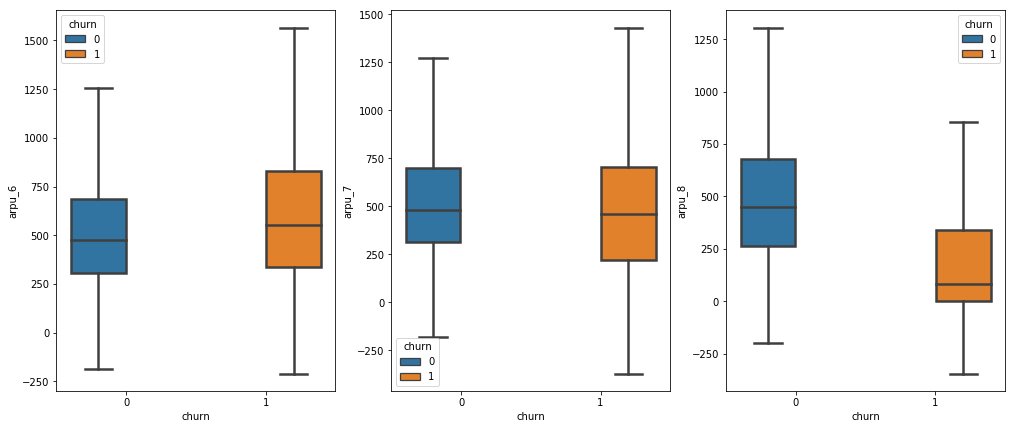

In [73]:
# extract columns for average revenue per user
arpu_cols = telecom.columns[telecom.columns.str.contains('arpu_')]

# analyze arpu
analyze_feature('arpu')

**We can see that arpu also drops signficantly in action phase for churned customers**

In [74]:
# Let us define new derived columns
# arpu for good phase: arpu_good_ph
telecom['arpu_good_ph'] = (telecom.arpu_6 + telecom.arpu_7)/2

# drop the original columns as these are not longer required
telecom.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

#### Minutes of Usage related variables

In [75]:
# let's derive minutes of usage columns
mou_cols = telecom.columns[telecom.columns.str.contains('mou')]

In [76]:
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [77]:
# let's check if there are any zero variation columns among these
zero_var_cols = telecom.loc[:,mou_cols].std()[telecom.loc[:,mou_cols].std()==0].index.values

zero_var_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype=object)

In [78]:
# let's drop these columns
telecom.drop(list(zero_var_cols),axis=1,inplace=True)

In [79]:
# let's check the % of null values among mou variables
mou_cols = telecom.columns[telecom.columns.str.contains('mou')]
100*telecom.loc[:,mou_cols].isnull().sum()/len(telecom.loc[:,mou_cols])

onnet_mou_6         1.816606
onnet_mou_7         1.789940
onnet_mou_8         3.913203
offnet_mou_6        1.816606
offnet_mou_7        1.789940
offnet_mou_8        3.913203
roam_ic_mou_6       1.816606
roam_ic_mou_7       1.789940
roam_ic_mou_8       3.913203
roam_og_mou_6       1.816606
roam_og_mou_7       1.789940
roam_og_mou_8       3.913203
loc_og_t2t_mou_6    1.816606
loc_og_t2t_mou_7    1.789940
loc_og_t2t_mou_8    3.913203
loc_og_t2m_mou_6    1.816606
loc_og_t2m_mou_7    1.789940
loc_og_t2m_mou_8    3.913203
loc_og_t2f_mou_6    1.816606
loc_og_t2f_mou_7    1.789940
loc_og_t2f_mou_8    3.913203
loc_og_t2c_mou_6    1.816606
loc_og_t2c_mou_7    1.789940
loc_og_t2c_mou_8    3.913203
loc_og_mou_6        1.816606
loc_og_mou_7        1.789940
loc_og_mou_8        3.913203
std_og_t2t_mou_6    1.816606
std_og_t2t_mou_7    1.789940
std_og_t2t_mou_8    3.913203
                      ...   
loc_ic_t2m_mou_6    1.816606
loc_ic_t2m_mou_7    1.789940
loc_ic_t2m_mou_8    3.913203
loc_ic_t2f_mou

In [80]:
# let's check the maximum % of missing value
100*telecom.loc[:,mou_cols].isnull().sum().max()/len(telecom.loc[:,mou_cols])

3.913202893236892

So for all minutes of usage columns the maximum missing % is 3.19 which seems that in these case the mobile has not been used at all for that particular call type(ic,std etc.), thus it is safe to assume that we can impute the missing values with zero.

In [81]:
# replaceing null values by 0 for minutes of usage variables
telecom.loc[:,mou_cols] = telecom.loc[:,mou_cols].replace(np.NaN,0)

Lets now analyze the sub groups of minutes of usage, following groups are there:
* og: outgoing calls
* ic: incoming calls
* offnet: all kinds of calls outside operator network
* onnet: all kinds of call within same operator network

Let us start by analyzing minutes for usage variables for month 6

In [82]:
# let's collect mou variables for month 6
mou_6 = telecom.columns[telecom.columns.str.contains('mou_6')]

In [83]:
mou_6

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

Let's check the outgoing mou variables.

In [84]:
mou_og_cols6 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]

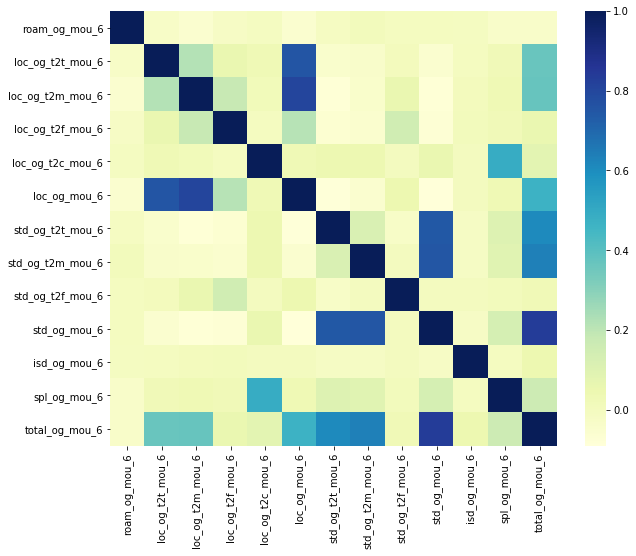

In [85]:
#sns.heatmap(telecom.loc[:,mou_cols6].corr())

# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(telecom.loc[:,mou_og_cols6].corr(), cmap="YlGnBu")
plt.show()

After analyzing the variables, we acertain the following relationships among variables: 

* **total_og_mou_6 = loc_og_mou_6+std_og_mou_6+spl_og_mou_6+isd_og_mou_6+ roam_og_mou_6+og_others_6**
* **std_og_mou_6 = std_og_t2m_mou_6+std_og_t2t_mou_6+std_og_t2f_mou_6 + std_og_2tc_mou_6**
* **loc_og_mou_6 = loc_og_t2m_mou_6+loc_og_t2t_mou_6+loc_og_t2f_mou_6 + loc_og_2tc_mou_6**

In [86]:
## fact checking!!
print(telecom.loc[7,'total_og_mou_6'],telecom.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

print(telecom.loc[7,'std_og_mou_6'],telecom.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())

print(telecom.loc[7,'loc_og_mou_6'],telecom.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

487.53 487.52000000000004
60.86 60.849999999999994
422.16 422.15


In [87]:
# As total_og_mou_6, std_og_mou_6 and loc_og_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_og_cols = telecom.columns[telecom.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

print(ls_total_og_cols)

telecom.drop(ls_total_og_cols,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


In [88]:
# let's define good phase derived variables for all og components:
telecom['spl_og_mou_good_ph'] = (telecom.spl_og_mou_6 + telecom.spl_og_mou_7)/2
telecom['isd_og_mou_good_ph'] = (telecom.isd_og_mou_6 + telecom.isd_og_mou_7)/2
telecom['roam_og_mou_good_ph'] = (telecom.roam_og_mou_6 + telecom.roam_og_mou_7)/2
telecom['std_og_t2m_mou_good_ph'] = (telecom.std_og_t2m_mou_6 + telecom.std_og_t2m_mou_7)/2
telecom['std_og_t2t_mou_good_ph'] = (telecom.std_og_t2t_mou_6 + telecom.std_og_t2t_mou_7)/2
telecom['std_og_t2f_mou_good_ph'] = (telecom.std_og_t2f_mou_6 + telecom.std_og_t2f_mou_7)/2

telecom['loc_og_t2m_mou_good_ph'] = (telecom.loc_og_t2m_mou_6 + telecom.loc_og_t2m_mou_7)/2
telecom['loc_og_t2t_mou_good_ph'] = (telecom.loc_og_t2t_mou_6 + telecom.loc_og_t2t_mou_7)/2
telecom['loc_og_t2f_mou_good_ph'] = (telecom.loc_og_t2f_mou_6 + telecom.loc_og_t2f_mou_7)/2
telecom['loc_og_t2c_mou_good_ph'] = (telecom.loc_og_t2c_mou_6 + telecom.loc_og_t2c_mou_7)/2

In [89]:
# drop all the original og mou variables
ls_og = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(ls_og)

telecom.drop(ls_og,axis=1,inplace=True)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
       'spl_og_mou_7'],
      dtype='object')


**Let's check for incoming mou variables**

In [90]:
mou_ic_cols6 = telecom.columns[telecom.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_ic_cols6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

As with og mou variables above, we observe the following relationship among ic (incoming)mou variables:

* **total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + roam_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6**
* **loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6**
* **std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6+std_ic_t2c_mou_6**

In [91]:
# fact checking!!
print(telecom.loc[7,'total_ic_mou_6'],telecom.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

print(telecom.loc[7,'loc_ic_mou_6'],telecom.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())

print(telecom.loc[7,'std_ic_mou_6'],telecom.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

626.46 626.92
427.88 427.86
180.54 180.51999999999998


In [92]:
# As total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_ic_cols = telecom.columns[telecom.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

telecom.drop(ls_total_ic_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [93]:
# let's define good phase derive variables for all ic components:
telecom['spl_ic_mou_good_ph'] = (telecom.spl_ic_mou_6 + telecom.spl_ic_mou_7)/2
telecom['isd_ic_mou_good_ph'] = (telecom.isd_ic_mou_6 + telecom.isd_ic_mou_7)/2
telecom['roam_ic_mou_good_ph'] = (telecom.roam_ic_mou_6 + telecom.roam_ic_mou_7)/2
telecom['std_ic_t2m_mou_good_ph'] = (telecom.std_ic_t2m_mou_6 + telecom.std_ic_t2m_mou_7)/2
telecom['std_ic_t2t_mou_good_ph'] = (telecom.std_ic_t2t_mou_6 + telecom.std_ic_t2t_mou_7)/2
telecom['std_ic_t2f_mou_good_ph'] = (telecom.std_ic_t2f_mou_6 + telecom.std_ic_t2f_mou_7)/2

telecom['loc_ic_t2m_mou_good_ph'] = (telecom.loc_ic_t2m_mou_6 + telecom.loc_ic_t2m_mou_7)/2
telecom['loc_ic_t2t_mou_good_ph'] = (telecom.loc_ic_t2t_mou_6 + telecom.loc_ic_t2t_mou_7)/2
telecom['loc_ic_t2f_mou_good_ph'] = (telecom.loc_ic_t2f_mou_6 + telecom.loc_ic_t2f_mou_7)/2

In [94]:
# drop all the original og mou variables
ls_ic = telecom.columns[telecom.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

print(ls_ic)

telecom.drop(ls_ic,axis=1,inplace=True)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'isd_ic_mou_6', 'isd_ic_mou_7'],
      dtype='object')


**offnet usage**

In [95]:
 offnet_cols = telecom.columns[telecom.columns.str.contains('offnet',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'offnet_mou_6', 7: 'offnet_mou_7', 8: 'offnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,364.92,377.79,352.68,463.15,489.51,490.20
Churned,469.29,381.51,143.30,650.11,591.94,325.64


<Figure size 1224x504 with 0 Axes>

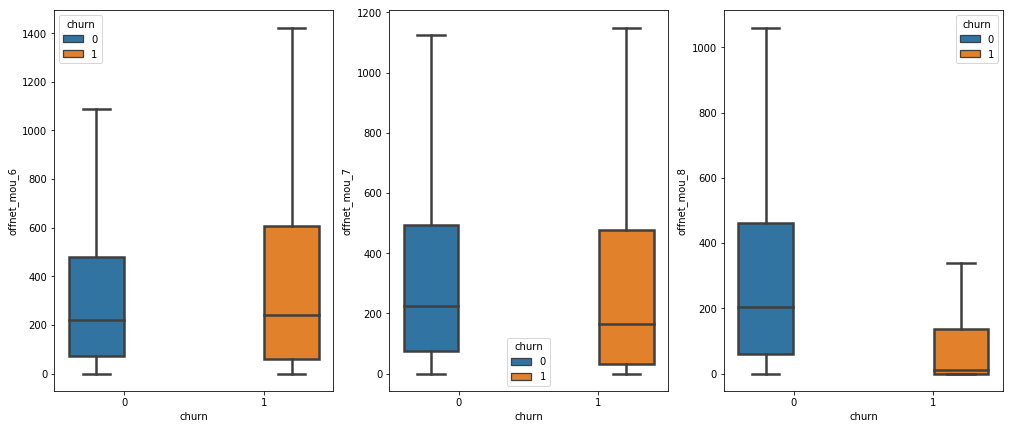

In [96]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_feature('offnet_mou')

There is a substantial decrease in offnet mou for action month.

In [97]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
telecom['offnet_mou_good_ph'] = (telecom.offnet_mou_6 + telecom.offnet_mou_7)/2

# drop the original columns as these are not longer required
telecom.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

#### minutes of usage related variables within same operator network

In [98]:
#let's extract the minutes of usage related columns
onnet_cols =  telecom.columns[telecom.columns.str.contains('^onnet.*mou',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'onnet_mou_6', 7: 'onnet_mou_7', 8: 'onnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,250.86,265.59,244.98,441.95,474.22,466.25
Churned,369.03,292.15,115.71,610.30,538.45,341.05


<Figure size 1224x504 with 0 Axes>

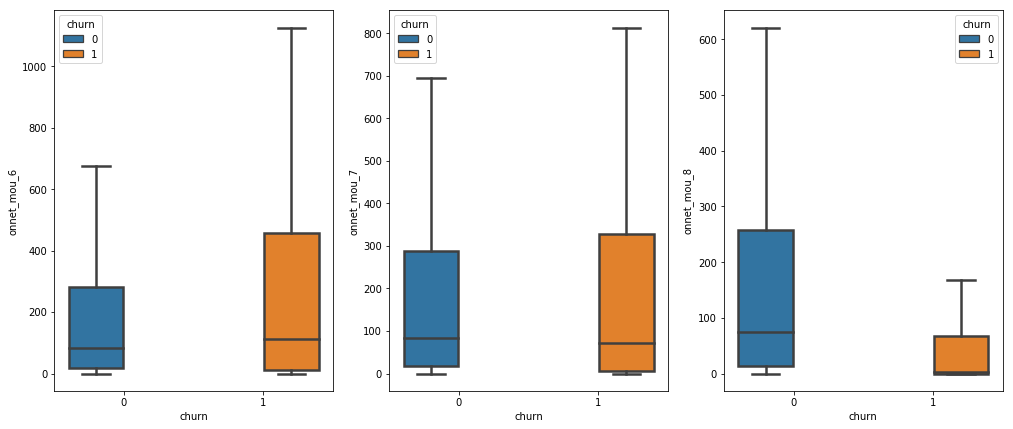

In [99]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_feature('onnet_mou')

We again see that there is a drop in minutes of usage in the action month (8th month) for churned customers

In [100]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
telecom['onnet_mou_good_ph'] = (telecom.onnet_mou_6 + telecom.onnet_mou_7)/2

# drop the original columns as these are not longer required
telecom.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [101]:
# let's check summary stats for oc others and ic others mou
ls_others = telecom.columns[telecom.columns.str.contains('_others')]

print(telecom.loc[:,ls_others].describe())

        og_others_6   og_others_7   og_others_8   ic_others_6   ic_others_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean       0.673323      0.043687      0.059953      1.174790      1.527682   
std        4.144797      2.701071      3.381939     14.113843     16.141140   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.060000      0.000000   
max      609.810000    370.130000    394.930000   1344.140000   1495.940000   

        ic_others_8  
count  28827.000000  
mean       1.274322  
std       13.038515  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.060000  
max     1209.860000  


we see from above that very few values are availabe for oc_others and ic_others.

In [102]:
# Let us define two new derived columns
# OG others for good phase: og_others_good_ph
# IC otherd for good phase: ic_others_good_ph
telecom['og_others_good_ph'] = (telecom.og_others_6 + telecom.og_others_7)/2
telecom['ic_others_good_ph'] = (telecom.ic_others_6 + telecom.ic_others_6)/2


# drop the original columns as these are not longer required
telecom.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

Let's check if there are any more columns with more than 20% NA values remaining.

In [103]:
is_more_than_20 = telecom.isnull().sum()/len(telecom) > 0.2
100*telecom.loc[:,is_more_than_20].isnull().sum()/len(telecom.loc[:,is_more_than_20])

night_pck_user_6               44.148528
night_pck_user_7               43.145228
night_pck_user_8               46.825106
fb_user_6                      44.148528
fb_user_7                      43.145228
fb_user_8                      46.825106
day_of_last_rech_data_shift    59.904670
dtype: float64

In [104]:
# lets drop these columns as we have already captured internet volume usage and total data amount recharged.
# also we have captured day of last recharge shift as well.
telecom.drop(telecom.columns[is_more_than_20],axis=1,inplace=True)

In [105]:
#when total recharge amount for any of the 3 months is 0 then the churn rate is high
telecom['total_rech_amt_zero'] = np.where(((telecom.total_rech_amt_good_ph == 0) | (telecom.total_rech_amt_8 == 0)), 1, 0)

In [106]:
#when average revenue is lessthan 50 then the churn rate is high
telecom['less_arpu'] = np.where(((telecom.arpu_good_ph <50) | (telecom.arpu_8 <50)), 1, 0)

In [107]:
# let's check how many variables are remaining!!
telecom.shape

(30001, 80)

In [108]:
is_na = telecom.isnull().sum()/len(telecom) > 0
100*telecom.loc[:,is_na].isnull().sum()/len(telecom.loc[:,is_na])

og_others_8               3.913203
ic_others_8               3.913203
day_of_last_rech_shift    2.306590
og_others_good_ph         2.606580
ic_others_good_ph         1.816606
dtype: float64

We can observe that these have very few values a NA indicating that there is no usage in these variables by customer.
Let's impute these values by 0.

In [109]:
telecom.loc[:,:] = telecom.loc[:,:].replace(np.NaN,0)

In [110]:
telecom.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,total_rech_amt_good_ph,total_rech_amt_data_good_ph,max_rech_amt_good_ph,last_day_rch_amt_good_ph,max_rech_data_good_ph,total_rech_num_good_ph,vol_2g_mb_good_ph,vol_3g_mb_good_ph,monthly_2g_good_ph,monthly_3g_good_ph,vbc_3g_good_ph,sachet_2g_good_ph,sachet_3g_good_ph,day_of_last_rech_shift,arpu_good_ph,spl_og_mou_good_ph,isd_og_mou_good_ph,roam_og_mou_good_ph,std_og_t2m_mou_good_ph,std_og_t2t_mou_good_ph,std_og_t2f_mou_good_ph,loc_og_t2m_mou_good_ph,loc_og_t2t_mou_good_ph,loc_og_t2f_mou_good_ph,loc_og_t2c_mou_good_ph,spl_ic_mou_good_ph,isd_ic_mou_good_ph,roam_ic_mou_good_ph,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,offnet_mou_good_ph,onnet_mou_good_ph,og_others_good_ph,ic_others_good_ph,total_rech_amt_zero,less_arpu
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,508.597957,234.112539,335.077044,12.500551,19.865615,78.077112,151.756812,5.886385,1.707746,148.441175,157.350068,1.584734,1.948970,6.557204,0.057607,62.619432,146.232731,14.403175,13.913705,27.922597,2.561970,0.026567,10.998257,1.224455,9.972868,584.365454,160.144462,92.393654,72.492917,105.913072,351.493998,0.153628,1.054865,0.211026,0.202393,1209.368754,169.138860,463.252944,0.084064,660.615179,492.005449,170.743275,100.624813,78.960685,11.784924,125.809755,357.227634,0.178877,0.223393,168.698363,1.140045,0.218443,-0.246358,559.636514,6.463458,2.138634,23.361816,183.677078,170.059634,1.814799,163.126630,85.079520,6.383899,1.73249,0.04040,11.330242,14.376429,30.008866,15.158141,2.747149,151.018801,66.045108,15.657016,375.898565,264.306159,0.349891,1.153449,0.075197,0.079797
std,6.908784e+05,501.961981,458.448598,482.062509,74.125281,104.719009,227.373609,233.660905,19.502281,7.208138,397.564547,409.100284,10.931804,44.712024,20.311857,3.315125,158.912293,214.882624,43.305191,71.338522,103.341828,19.896938,0.110697,70.600636,12.783238,9.274370,611.245907,173.207799,145.182324,110.567519,313.384838,919.021056,0.406486,2.535940,0.617549,1.100107,957.677989,420.974354,1622.766035,0.277488,515.173412,1238.537230,154.193137,115.928063,103.209211,8.634676,300.031016,839.986477,0.387763,0.571149,392.776395,2.414776,0.947966,5.233619,429.909145,17.314038,44.719965,93.281425,393.887902,385.607865,11.529439,232.215248,222.279441,20.955732,6.48236,0.15064,73.233106,66.078507,93.957854,75.054257,17.908139,207.004076,157.153746,44.3

In [111]:
apru_columns =  telecom.columns[telecom.columns.str.contains('arpu')].tolist()
apru_columns

['arpu_8', 'arpu_good_ph', 'less_arpu']

In [112]:
#Let remove the upper outliers in the data

all_column = telecom.columns.tolist()
cols = list(set(all_column)-set(['mobile_number', 'monthly_3g_6','monthly_3g_7','monthly_3g_8','aon','churned']))
i=1

# removing the upper side outliers
for c in cols:  
    Q1 =  telecom[c].quantile(0.995)
    telecom = telecom[telecom[c]<=Q1]
    print(i,"  ",c,"---",telecom.shape)
    i=i+1

# removing the lower side outliers

for d in apru_columns:  
    Q2 =  telecom[d].quantile(0.005)
    telecom = telecom[telecom[d]>=Q2]
    print(i,"  ",d,"---",telecom.shape)
    i=i+1
    

1    loc_og_t2t_mou_8 --- (29851, 80)
2    total_rech_num_good_ph --- (29704, 80)
3    std_ic_t2m_mou_good_ph --- (29555, 80)
4    offnet_mou_8 --- (29407, 80)
5    sachet_2g_good_ph --- (29288, 80)
6    total_rech_num_8 --- (29141, 80)
7    loc_og_t2f_mou_good_ph --- (28995, 80)
8    max_rech_data_good_ph --- (28850, 80)
9    last_day_rch_amt_good_ph --- (28707, 80)
10    ic_others_8 --- (28563, 80)
11    std_ic_t2f_mou_good_ph --- (28420, 80)
12    last_day_rch_amt_8 --- (28294, 80)
13    loc_og_t2c_mou_good_ph --- (28152, 80)
14    onnet_mou_8 --- (28011, 80)
15    roam_ic_mou_good_ph --- (27870, 80)
16    sachet_3g_8 --- (27743, 80)
17    loc_og_t2m_mou_good_ph --- (27604, 80)
18    max_rech_amt_8 --- (27472, 80)
19    loc_og_t2c_mou_8 --- (27334, 80)
20    total_rech_amt_8 --- (27197, 80)
21    vbc_3g_good_ph --- (27061, 80)
22    og_others_8 --- (26927, 80)
23    max_rech_data_8 --- (26860, 80)
24    std_ic_t2m_mou_8 --- (26725, 80)
25    isd_og_mou_8 --- (26591, 80)
26    max_re

In [113]:
telecom.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,total_rech_amt_good_ph,total_rech_amt_data_good_ph,max_rech_amt_good_ph,last_day_rch_amt_good_ph,max_rech_data_good_ph,total_rech_num_good_ph,vol_2g_mb_good_ph,vol_3g_mb_good_ph,monthly_2g_good_ph,monthly_3g_good_ph,vbc_3g_good_ph,sachet_2g_good_ph,sachet_3g_good_ph,day_of_last_rech_shift,arpu_good_ph,spl_og_mou_good_ph,isd_og_mou_good_ph,roam_og_mou_good_ph,std_og_t2m_mou_good_ph,std_og_t2t_mou_good_ph,std_og_t2f_mou_good_ph,loc_og_t2m_mou_good_ph,loc_og_t2t_mou_good_ph,loc_og_t2f_mou_good_ph,loc_og_t2c_mou_good_ph,spl_ic_mou_good_ph,isd_ic_mou_good_ph,roam_ic_mou_good_ph,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,offnet_mou_good_ph,onnet_mou_good_ph,og_others_good_ph,ic_others_good_ph,total_rech_amt_zero,less_arpu
count,2.086800e+04,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.0,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000
mean,7.001206e+09,404.232679,180.750510,264.562249,5.798217,10.550612,58.036415,128.839855,3.972657,1.169912,118.495873,121.605533,0.623185,0.121037,4.503189,0.0,47.939802,125.693097,10.257542,7.993400,17.898949,1.150395,0.023362,4.024357,0.546584,8.932432,463.394863,134.706872,77.507380,63.675724,86.560563,239.789188,0.150182,0.982413,0.153393,0.122915,1216.289486,128.352078,290.215449,0.084052,548.761046,351.356215,146.853915,88.095481,72.349962,10.883578,114.925693,256.720233,0.179437,0.168464,132.019255,1.123203,0.154663,-0.354251,466.042663,4.784124,0.202530,14.510143,151.633753,143.325682,0.717134,142.065830,64.313183,4.457831,1.302596,0.036442,4.758096,8.522482,20.587967,8.963416,1.422779,130.599386,51.432921,11.479535,311.379087,213.430017,0.251306,0.453479,0.079164,0.086879
std,6.910389e+05,265.418017,293.877217,310.284833,23.608509,42.233230,109.606182,167.317695,9.489365,3.587197,273.048496,258.547757,3.029857,1.218310,8.931043,0.0,76.142856,149.413422,21.663650,22.355138,38.022386,4.111433,0.091330,16.446807,2.411769,7.304011,323.795385,100.810367,91.452637,89.047634,210.366123,480.027522,0.384023,2.123703,0.442938,0.504816,959.087543,282.280752,580.795342,0.277473,248.713025,531.850372,93.584409,78.142125,84.232470,6.936726,232.983437,449.497805,0.375091,0.396649,274.149847,2.120380,0.464542,5.220721,211.117247,7.813733,1.424886,44.630160,277.896842,281.649065,2.741731,172.654123,111.212565,10.164562,3.206902,0.081863,19.284154,29.817823,41.192271,20.320143,4.962946,140.680776,73.467430,23.880548,318.219196,298.150523,0.676806,1

In [114]:
telecom.churn.value_counts(normalize=True)

0    0.915948
1    0.084052
Name: churn, dtype: float64

### Model building

In this section we will build multiple machine learning models to accurately predict customers who might churn in the action phase (8th Month)

In [115]:
# Putting feature variable to X
X = telecom.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom['churn']

In [116]:
X.shape, y.shape

((20868, 78), (20868,))

#### Additional feature engineering

We will do some additional feature transformation to achieve better accuracy in our predictive model. We know from EDA above that a drop in action phase parameter as compared to good phase value is highly indicative of a likely churn, let's use this heuristic to derive action phase column which is actually the difference between good phase feature value and action phase (8th month) feature value and discard the 8th month feature columns.

In [117]:
# extract good phase feature list and 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

In [118]:
# define function to calculate difference between 8th month feature and good phase feature
def FindDiff(x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff) 

In [119]:
# create a feature data frame copy from original features
X_diff = X.copy()

In [120]:
# extract features without any good phase or 8th month indicator.
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [121]:
# create new derived columns for action phase.
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(FindDiff)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [122]:
# drop 8th month columns as we have already derived action phase columns.
X_diff.drop(f_8,axis=1,inplace=True)

#### feature standardisation

Let's do a feature standardisation

In [123]:
# extract columns
cols = X_diff.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X_diff)

# convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [124]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

Let's define a function to print out evaluation metrics, as we have customer churn as positive class (1) we would try to maximize sensitivity at the same time trying to keep auc_score at a good level.

In [125]:
# define function to calculate and print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("f1 Score: ",f1_score(y_test,y_pred))
    print("Accuracy: ",accuracy_score(y_test,y_pred))

In [126]:
# let's start by building as basic logistic regression model
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression(random_state=100)

In [127]:
lsr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
# predict results on test
y_pred = lsr.predict(X_test)

In [129]:
# print model evaluation metrics
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[5626  101]
 [ 300  234]]
Sensitivity:  0.43820224719101125
Specificity:  0.9823642395669635
AUC Score:  0.7102832433789874
f1 Score:  0.5385500575373993
Accuracy:  0.9359527232071554


We do see from above that the sensitivity and auc score is pretty low, this is because the data imbalanced. **We will do imbalanced class handling to rectify this**.

#### Imbalanced class handling

In this section we will try to reduce class imbalance by trying out two techniques:

* **SMOTE resampling**: by generating synthetic samples for the minority class.
* **Majority Class Undersampling**: by deliberately undersampling the majority class.

#### SMOTE resampling

In [130]:
# import SMOTE sampler from imblearn library
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")

In [131]:
# SMOTE sampling the training data
X_sm, y_sm = smote.fit_sample(X_train, y_train)

#### Majority Class Undersampling

We will create our own function for majority class undersampling. This function will randomly sample the majority class equal to the number of minority class samples from training data.

In [132]:
# function to undersample majority class
def MajorityClassUnderSampler(X_train,y_train):
    # create training data frame
    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    # select the minority class (in our case churn)
    df_train_minority_class  = df_train.loc[df_train.churn == 1,:]
    
    # create data frame with majority class samples same as minority class
    df_train_majority_undersampled = pd.concat([df_train_minority_class,df_train.loc[df_train.churn == 0,:].sample(df_train_minority_class.shape[0])])

    return df_train_majority_undersampled

In [133]:
# create majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

In [134]:
lsr = LogisticRegression(random_state=100)
lsr.fit(X_sm,y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
y_pred = lsr.predict(X_test)
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[4944  783]
 [ 100  434]]
Sensitivity:  0.8127340823970037
Specificity:  0.8632792037716082
AUC Score:  0.838006643084306
f1 Score:  0.4957167332952598
Accuracy:  0.8589682159399457


Let's generate model with majority class undersampling, as our function is doing random sampling of majority class, let's take the average of 10 runs to find the model metrics.

In [136]:
sensitivity_avg = 0
specificity_avg = 0
auc_score_avg = 0

for i in range(0,10):
    #rus = RandomUnderSampler()
    #X_rs, y_rs = rus.fit_sample(X_train, y_train)
    df_train_mju = MajorityClassUnderSampler(X_train,y_train)
    # extract features and labels
    X_mju = df_train_mju.drop('churn',axis=1)
    y_mju = df_train_mju.churn
    lsr = LogisticRegression()
    lsr.fit(X_mju,y_mju)
    #lsr.fit(X_rs,y_rs)
    y_pred = lsr.predict(X_test)
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    auc_score = roc_auc_score(y_test,y_pred)
    sensitivity_avg = sensitivity_avg + sensitivity
    specificity_avg = specificity_avg+ specificity
    auc_score_avg = auc_score_avg + auc_score

In [137]:
print('Sensitivity: ',sensitivity_avg/10)
print('Specificity: ',specificity_avg/10)
print('AUC Score: ',auc_score_avg/10)

Sensitivity:  0.8245318352059925
Specificity:  0.8458529771258949
AUC Score:  0.8351924061659437


Summary:
    1. Both the resampling method is giving similar result.
    2. Only difference here is Majority class undersampling match the number minor class record with the major one
       but this is not the case in SMOTE method. 
    
    

### PCA
As the number of features are quite high, let's try dimensionality reduction with PCA and try model creation on reduced feature set.

In [138]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [139]:
#Doing the PCA on the train data
pca.fit_transform(X_mju)

array([[-6.55069969e+02, -7.68002888e+02,  7.52845394e+01, ...,
        -7.53367866e-04, -4.36472171e-02,  3.53464147e-15],
       [-7.19469549e+02, -3.10328655e+02, -6.43846834e+01, ...,
         7.17178932e-03, -3.11385117e-03, -5.54698564e-13],
       [ 1.90928749e+03,  2.55788362e+01,  1.44254420e+02, ...,
        -5.20291259e-03,  3.61722215e-03,  2.25677148e-13],
       ...,
       [-6.39484465e+02, -8.74522018e+01, -3.72578566e+02, ...,
        -2.43287772e-03,  1.13384992e-02, -1.06744455e-15],
       [ 1.71408801e+03, -1.25963644e+02,  3.53877630e+02, ...,
        -1.50135028e-02,  3.80851473e-02,  6.26020732e-14],
       [-6.86327488e+02, -7.10734877e+02,  1.03818974e+02, ...,
        -1.19044172e-02, -4.27059307e-02,  2.63753540e-14]])

In [140]:
pca.components_

array([[ 9.53572066e-01,  3.74840217e-02, -1.43343748e-01, ...,
         3.85130975e-05,  7.79836650e-02,  6.63701252e-05],
       [ 1.33538960e-01, -1.65687299e-01,  5.22947911e-01, ...,
        -1.12302307e-04,  1.03295321e-01, -1.62699517e-04],
       [ 2.24090676e-01,  1.69823351e-01,  1.20342710e-01, ...,
        -1.68451557e-04, -3.25182919e-01, -1.93137914e-04],
       ...,
       [ 1.41370002e-06, -1.58796340e-05, -1.57622982e-04, ...,
         4.54185111e-01,  1.34988121e-06,  1.14006253e-01],
       [ 2.71698920e-06, -9.14794347e-06,  4.94541832e-06, ...,
        -6.77858970e-05,  1.79768334e-05, -8.44774208e-04],
       [-0.00000000e+00,  1.24576058e-17,  6.51018582e-17, ...,
        -2.05925479e-13, -5.46078031e-17, -3.68293052e-14]])

In [141]:
colnames = list(X_mju.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.953572,0.133539,aon
1,0.037484,-0.165687,total_rech_amt_good_ph
2,-0.143344,0.522948,total_rech_amt_data_good_ph
3,0.029827,0.007285,max_rech_amt_good_ph
4,0.022063,0.000313,last_day_rch_amt_good_ph
5,0.001688,0.050423,max_rech_data_good_ph
6,-0.001383,-0.002209,total_rech_num_good_ph
7,-0.021687,0.090945,vol_2g_mb_good_ph
8,-0.022276,0.296601,vol_3g_mb_good_ph
9,0.000038,0.000088,monthly_2g_good_ph


In [142]:
pca.explained_variance_ratio_

array([2.68130177e-01, 2.10206034e-01, 1.24706768e-01, 8.55258216e-02,
       7.64238939e-02, 4.44192112e-02, 4.06802494e-02, 2.55069840e-02,
       2.04970372e-02, 1.89491234e-02, 1.35139427e-02, 1.26427632e-02,
       1.18492325e-02, 6.67620263e-03, 5.77860810e-03, 5.26826140e-03,
       4.10803456e-03, 3.80727935e-03, 3.26885764e-03, 2.62708019e-03,
       2.08098464e-03, 1.91420585e-03, 1.71632091e-03, 1.52425321e-03,
       1.22007782e-03, 1.06776316e-03, 1.03225832e-03, 9.93875445e-04,
       7.33314442e-04, 5.04470899e-04, 4.18348403e-04, 3.56583253e-04,
       2.82539930e-04, 2.65056393e-04, 2.21593290e-04, 1.93983117e-04,
       1.73622428e-04, 1.71959341e-04, 1.23527776e-04, 9.41963975e-05,
       4.86469165e-05, 4.51400465e-05, 4.05294107e-05, 3.86632696e-05,
       3.05285275e-05, 2.95517394e-05, 2.30294096e-05, 1.23697925e-05,
       1.02440088e-05, 9.49934773e-06, 9.01129742e-06, 8.09801779e-06,
       4.60122353e-06, 3.03386692e-06, 2.80655603e-06, 2.39238136e-06,
      

In [143]:
print (pca.explained_variance_ratio_.cumsum())

[0.26813018 0.47833621 0.60304298 0.6885688  0.76499269 0.80941191
 0.85009215 0.87559914 0.89609618 0.9150453  0.92855924 0.94120201
 0.95305124 0.95972744 0.96550605 0.97077431 0.97488234 0.97868962
 0.98195848 0.98458556 0.98666655 0.98858075 0.99029707 0.99182133
 0.9930414  0.99410917 0.99514143 0.9961353  0.99686862 0.99737309
 0.99779143 0.99814802 0.99843056 0.99869561 0.99891721 0.99911119
 0.99928481 0.99945677 0.9995803  0.9996745  0.99972314 0.99976828
 0.99980881 0.99984748 0.999878   0.99990756 0.99993059 0.99994296
 0.9999532  0.9999627  0.99997171 0.99997981 0.99998441 0.99998744
 0.99999025 0.99999264 0.99999439 0.99999572 0.99999673 0.99999752
 0.99999812 0.99999862 0.99999899 0.99999926 0.99999949 0.99999965
 0.99999974 0.99999984 0.99999989 0.99999993 0.99999995 0.99999997
 0.99999998 0.99999999 1.         1.         1.         1.        ]


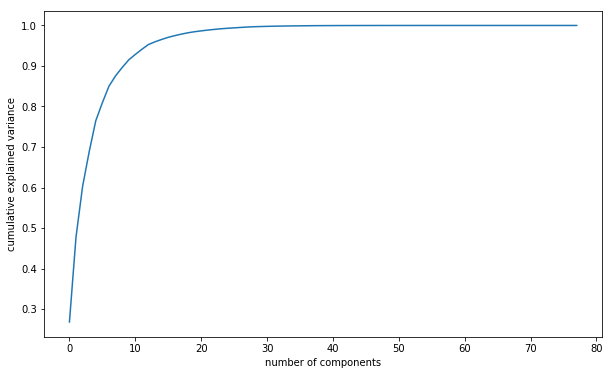

In [144]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Summary of the plot
    1. The 12 principal components are enough to to explain 94.5% variance.
    2. The 18 principal components are enough to explain the 97.9% variance.
    3. Here we work with 42 PC which in turn, explains 99.98% variance.  

In [145]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=42)

In [146]:
train_pca = pca_final.fit_transform(X_mju)
train_pca.shape

(2440, 42)

In [147]:
test_pca = pca_final.transform(X_test)
test_pca.shape

(6261, 42)

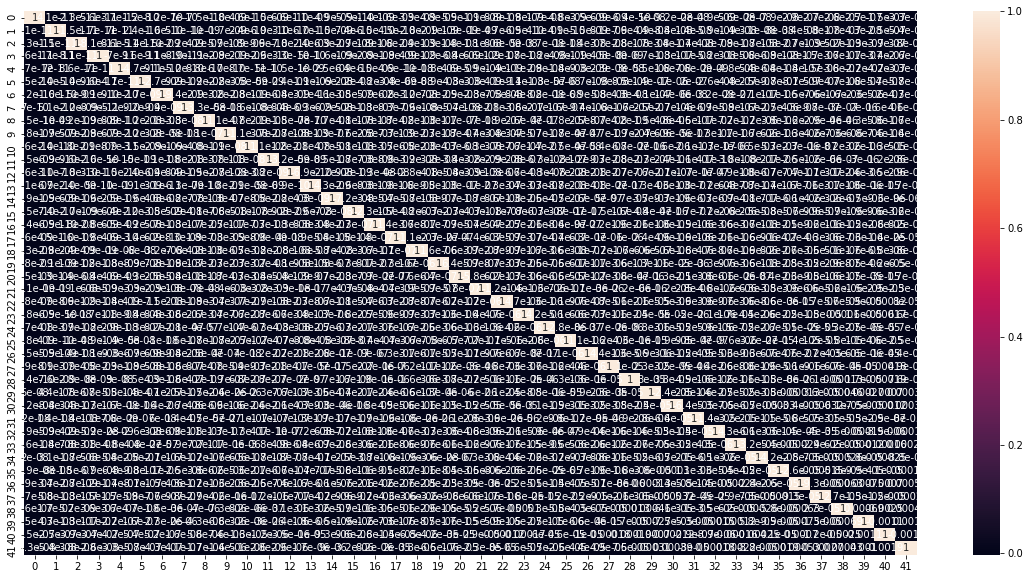

In [148]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [149]:
lr_pca = LogisticRegression(random_state=100)
model_pca = lr_pca.fit(train_pca,y_mju)

In [150]:
y_pred = lr_pca.predict(test_pca)
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[4631 1096]
 [  83  451]]
Sensitivity:  0.8445692883895131
Specificity:  0.8086258075781386
AUC Score:  0.8265975479838258
f1 Score:  0.43344545891398367
Accuracy:  0.8116914230953521


#### Adjusting probability threshold cutoff for logistic regression

We will now try to select the optimum probability threshold for our model

In [151]:
# check the predicted probabilities
y_pred_prob = lr_pca.predict_proba(test_pca)

In [152]:
# create predicted probability data frame
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)

In [153]:
# renaming column
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn,ID,Churn_Prob
0,0,81191,0.475627
1,0,89797,0.184548
2,0,18537,0.274333
3,0,39043,0.115304
4,0,28621,0.110680


In [154]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

,ID,churn,Churn_Prob
0,81191,0,0.475627
1,89797,0,0.184548
2,18537,0,0.274333
3,39043,0,0.115304
4,28621,0,0.110680


In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,81191,0,0.475627,1,1,1,1,1,0,0,0,0,0
1,89797,0,0.184548,1,1,0,0,0,0,0,0,0,0
2,18537,0,0.274333,1,1,1,0,0,0,0,0,0,0
3,39043,0,0.115304,1,1,0,0,0,0,0,0,0,0
4,28621,0,0.110680,1,1,0,0,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi]
print(cutoff_df)

     prob  accuracy     speci     sensi
0.0   0.0  0.085290  0.000000  1.000000
0.1   0.1  0.424533  0.373843  0.968165
0.2   0.2  0.560134  0.524533  0.941948
0.3   0.3  0.657882  0.634887  0.904494
0.4   0.4  0.744929  0.732670  0.876404
0.5   0.5  0.811691  0.808626  0.844569
0.6   0.6  0.862642  0.867644  0.808989
0.7   0.7  0.898579  0.914440  0.728464
0.8   0.8  0.921738  0.953553  0.580524
0.9   0.9  0.923974  0.986730  0.250936


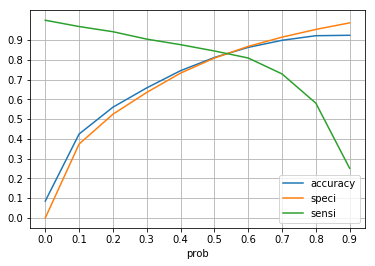

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi'])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(True, which='major')
plt.show()

In [196]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)

In [197]:
#Let's check the overall metrics.
printMetrics(y_pred_final.churn, y_pred_final.final_predicted)

Confusion Matrix: 
 [[4731  996]
 [  87  447]]
Sensitivity:  0.8370786516853933
Specificity:  0.8260869565217391
AUC Score:  0.8315828041035661
f1 Score:  0.4522003034901366
Accuracy:  0.827024436990896


Summary of results:
    1. Logistic regression without PCA:
        Sensitivity = 82.45
        Specificity = 84.58
        
    2. Logistic regression with PCA:
        Sensitivity = 83.70
        Specificity = 82.60
        
Clearly, there is remarkable difference in the metrics in both the cases. But ofcourse the logistic regression with 
***PCA is more stable model as it also take care of multicollinearity*** between the variables.



## Tree Models

Lets see the performance of the other algorithms.

In [160]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [161]:
# Create the parameter grid to find the optimum value of the hyperparameters.
param_grid = {
    'max_depth': range(5, 15, 1),
    'min_samples_leaf': range(5, 50, 5),
    'min_samples_split': range(20, 70, 10),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_mju)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:  8.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15), 'min_samples_leaf': range(5, 50, 5), 'min_samples_split': range(20, 70, 10), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [162]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130860,0.003521,0.000997,0.000001,entropy,5,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725410,0.731557,0.713115,0.739754,0.760246,0.734016,0.015735,734,0.802254,0.796619,0.796619,0.794057,0.799180,0.797746,0.002776
1,0.127257,0.006471,0.001040,0.000073,entropy,5,5,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725410,0.731557,0.713115,0.739754,0.760246,0.734016,0.015735,734,0.801742,0.796619,0.796619,0.794057,0.795594,0.796926,0.002584
2,0.131654,0.001998,0.000800,0.000400,entropy,5,5,40,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.725410,0.735656,0.713115,0.739754,0.760246,0.734836,0.015692,689,0.801742,0.791496,0.796619,0.794057,0.795594,0.795902,0.003392
3,0.131055,0.004350,0.000426,0.000523,entropy,5,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727459,0.735656,0.706967,0.739754,0.760246,0.734016,0.017310,734,0.798156,0.791496,0.793033,0.794057,0.792008,0.793750,0.002372
4,0.132447,0.000974,0.000597,0.000488,entropy,5,5,60,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727459,0.735656,0.702869,0.745902,0.760246,0.734426,0.019206,713,0.798156,0.791496,0.788934,0.793033,0.792008,0.792725,0.003033
5,0.131049,0.001018,0.000599,0.000489,entropy,5,10,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719262,0.733607,0.706967,0.750000,0.760246,0.734016,0.019458,734,0.799693,0.795082,0.793545,0.790984,0.798668,0.795594,0.003224
6,0.128658,0.005501,0.000997,0.000002,entropy,5,10,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719262,0.733607,0.706967,0.750000,0.760246,0.734016,0.019458,734,0.799693,0.795082,0.793545,0.790984,0.796107,0.795082,0.002880
7,0.128289,0.005816,0.000838,0.000463,entropy,5,10,40,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.719262,0.737705,0.706967,0.750000,0.760246,0.734836,0.019509,689,0.799693,0.789959,0.793545,0.790984,0.796107,0.794057,0.003534
8,0.127179,0.005593,0.000400,0.000489,entropy,5,10,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.721311,0.737705,0.706967,0.750000,0.760246,0.735246,0.019197,676,0.796107,0.789959,0.789447,0.790984,0.792008,0.791701,0.002372
9,0.122621,0.017901,0.000865,0.000361,entropy,5,10,60,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.721311,0.737705,0.702869,0.750000,0.760246,0.734426,0.020434,713,0.796107,0.789959,0.785348,0.790984,0.792008,0.790881,0.003465


In [163]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7491803278688525
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


**Running the model with best parameters obtained from grid search.**

In [192]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=25,
                                  min_samples_split=20)
clf_gini.fit(train_pca,y_mju)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [193]:
# accuracy score
clf_gini.score(test_pca,y_test)

0.7816642708832455

In [194]:
# classification metrics
y_pred = clf_gini.predict(test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      5727
           1       0.24      0.71      0.36       534

   micro avg       0.78      0.78      0.78      6261
   macro avg       0.60      0.75      0.61      6261
weighted avg       0.91      0.78      0.82      6261



In [195]:
# confusion matrix
printMetrics(y_test,y_pred)

Confusion Matrix: 
 [[4513 1214]
 [ 153  381]]
Sensitivity:  0.7134831460674157
Specificity:  0.7880216518246901
AUC Score:  0.7507523989460528
f1 Score:  0.35791451385627054
Accuracy:  0.7816642708832455


### Looking at the matrics above, clearly the logistic regression is better than decision tree model for this problem.

## Random Forest

In [168]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=100)

In [169]:
# fit
rfc.fit(train_pca,y_mju)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [170]:
# Making predictions
predictions = rfc.predict(test_pca)

In [171]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      5727
           1       0.30      0.71      0.43       534

   micro avg       0.84      0.84      0.84      6261
   macro avg       0.64      0.78      0.67      6261
weighted avg       0.91      0.84      0.86      6261



In [172]:
# confusion matrix
printMetrics(y_test,predictions)

Confusion Matrix: 
 [[4858  869]
 [ 155  379]]
Sensitivity:  0.7097378277153558
Specificity:  0.8482626156801117
AUC Score:  0.7790002216977339
f1 Score:  0.425364758698092
Accuracy:  0.8364478517808657


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

In [173]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,10,12],
    'min_samples_leaf': range(5, 50, 10),
    'min_samples_split': range(10, 80, 20),
    'n_estimators': [50,75,100,150], 
    'max_features': [5, 10, 15, 20]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring= 'recall')

In [174]:
# Fit the grid search to the data
grid_search.fit(train_pca,y_mju)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  9.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 8, 10, 12], 'min_samples_leaf': range(5, 50, 10), 'min_samples_split': range(10, 80, 20), 'n_estimators': [50, 75, 100, 150], 'max_features': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [175]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7942622950819672 using {'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


**Fitting the final model with the best parameters obtained from grid search.**

In [198]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             max_features=5,
                             n_estimators=50, random_state=100)

In [199]:
train_pca.shape, y_mju.shape, test_pca.shape

((2440, 42), (2440,), (6261, 42))

In [200]:
# fit
rfc.fit(train_pca,y_mju)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [201]:
# predict
predictions_rfc = rfc.predict(test_pca)

In [202]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5727
           1       0.31      0.79      0.45       534

   micro avg       0.83      0.83      0.83      6261
   macro avg       0.64      0.81      0.68      6261
weighted avg       0.92      0.83      0.86      6261



In [203]:
# confusion matrix
printMetrics(y_test,predictions_rfc)

Confusion Matrix: 
 [[4796  931]
 [ 111  423]]
Sensitivity:  0.7921348314606742
Specificity:  0.8374367033350795
AUC Score:  0.8147857673978768
f1 Score:  0.4480932203389831
Accuracy:  0.8335729116754512


Summary:
    
    1. The Sensitivity here is not better than the logistic regression with PCA model.
    2. The Sensitivity is lowered by 4% from logistic regression.
    3. In our problem, we want to maximize Sensitivity (i.e maximize the correct predictions of churns).
    
 So, we will choose Logistic Regression for the prediction.

## Random Forest for feature importance

In [182]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,10,12],
    'min_samples_leaf': range(5, 50, 10),
    'min_samples_split': range(10, 80, 20),
    'n_estimators': [50,75,100,150], 
    'max_features': [5, 10, 15, 20]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring= 'recall')

In [183]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 110.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 116.4min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 123.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 8, 10, 12], 'min_samples_leaf': range(5, 50, 10), 'min_samples_split': range(10, 80, 20), 'n_estimators': [50, 75, 100, 150], 'max_features': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [184]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.4205154889710948 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 75}


**Fitting the final model with the best parameters obtained from grid search.**

In [204]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             max_features=20,
                             n_estimators=75,
                             random_state=100)

In [205]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [206]:
# predict
predictions_rfc = rfc.predict(X_test)

In [207]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5727
           1       0.73      0.44      0.55       534

   micro avg       0.94      0.94      0.94      6261
   macro avg       0.84      0.71      0.76      6261
weighted avg       0.93      0.94      0.93      6261



In [208]:
# confusion matrix
printMetrics(y_test,predictions_rfc)

Confusion Matrix: 
 [[5638   89]
 [ 299  235]]
Sensitivity:  0.4400749063670412
Specificity:  0.9844595774401955
AUC Score:  0.7122672419036185
f1 Score:  0.5477855477855478
Accuracy:  0.9380290688388436


In [212]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

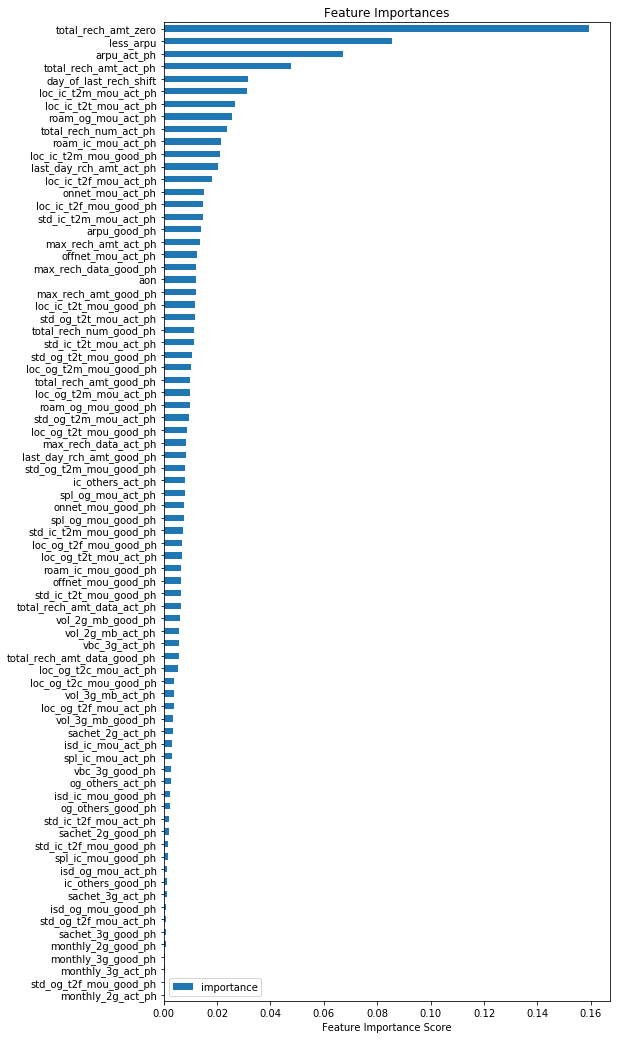

In [214]:
# Important Features from highly important feature to less important features
feature_importances.plot.barh(title="Feature Importances", figsize=(8,18))
plt.xlabel('Feature Importance Score')
plt.show()

In [217]:
#important featues with dataframe
feature_importances.sort_values('importance', ascending=False)

,importance
total_rech_amt_zero,0.159187
less_arpu,0.085466
arpu_act_ph,0.067351
total_rech_amt_act_ph,0.047643
day_of_last_rech_shift,0.031496
loc_ic_t2m_mou_act_ph,0.031146
loc_ic_t2t_mou_act_ph,0.026812
roam_og_mou_act_ph,0.025583
total_rech_num_act_ph,0.023778
roam_ic_mou_act_ph,0.021365


## Recommendations:

            1. Once the total recharge amount is started decreasing abnormally for the particular customers, 
               we should talk and understand their reason and act on it.
            2. Similarily, lower revenue per user (<50) is also one of the indicator for early identication of the likely 
               churn, so act of the indicator as quickly as possible.
            3. Similarly, see for the calls decrease and act on it.
            4. Date of last recharge also acts as a driver so, company should act on the customers who's last recharge cross
               a threshold.